In [1]:
import numpy as np

In [2]:
import pandas as pd

In [4]:
from google.colab import files


uploaded = files.upload()

Saving placement.csv to placement.csv


In [23]:
df=pd.read_csv("placement.csv")

In [24]:
df.head

<bound method NDFrame.head of     Unnamed: 0  cgpa     iq  placement
0            0   6.8  123.0          1
1            1   5.9  106.0          0
2            2   5.3  121.0          0
3            3   7.4  132.0          1
4            4   5.8  142.0          0
..         ...   ...    ...        ...
95          95   4.3  200.0          0
96          96   4.4   42.0          0
97          97   6.7  182.0          1
98          98   6.3  103.0          1
99          99   6.2  113.0          1

[100 rows x 4 columns]>

In [26]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [31]:
new=df.iloc[:,1:4]

In [32]:
new.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [37]:
import matplotlib.pyplot as plt

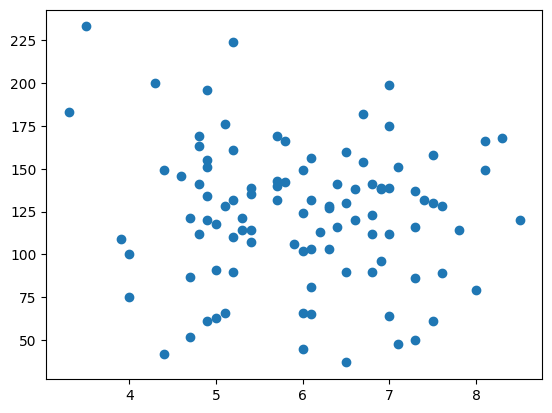

In [50]:
plt.scatter(new['cgpa'],new['iq'])

In [51]:
#data looks like classification problem
x=new.iloc[:,0:2]

In [52]:
y=new.iloc[:,-1]

In [53]:
x.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [54]:
y.head()

,placement
0,1
1,0
2,0
3,1
4,0


In [123]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [124]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [125]:
x_train=scaler.fit_transform(x_train)

In [126]:
x_train

array([[ 5.04010529e-01,  1.52854687e-01],
       [ 3.27936982e-01, -5.40771624e-01],
       [-1.16868817e+00,  5.63892501e-01],
       [ 1.03223117e+00, -1.95371411e+00],
       [-8.16541075e-01, -1.56836616e+00],
       [-1.08065140e+00, -1.85095466e+00],
       [ 7.68120850e-01,  4.35443184e-01],
       [ 6.80084076e-01,  7.69411408e-01],
       [ 8.56157623e-01,  3.58373594e-01],
       [ 5.92047302e-01,  3.58373594e-01],
       [-6.40467528e-01, -8.74739848e-01],
       [-9.04577849e-01, -1.04043947e-01],
       [-2.31316623e+00,  1.51441745e+00],
       [-9.04577849e-01, -1.61974589e+00],
       [-1.43279849e+00,  1.95114512e+00],
       [-2.00283660e-01,  1.15475936e+00],
       [ 1.47241504e+00, -9.00429711e-01],
       [ 7.68120850e-01, -2.69743565e-02],
       [ 1.20830472e+00, -9.77499302e-01],
       [-9.04577849e-01,  6.92341818e-01],
       [-2.42101127e-02, -4.63702034e-01],
       [ 9.44194397e-01,  1.92545526e+00],
       [-7.28504302e-01,  1.01474960e-01],
       [ 9.

In [127]:
x_test=scaler.transform(x_test)

In [128]:
x_test

array([[ 0.9441944 ,  1.30889854],
       [ 0.68008408,  1.48872758],
       [-0.90457785,  1.84838567],
       [ 2.264746  , -0.10404395],
       [-1.0806514 , -0.07835408],
       [ 0.85615762, -0.72060067],
       [-0.99261462,  1.15475936],
       [ 0.06382666,  0.64096209],
       [-0.7285043 , -1.49129657],
       [ 1.91259891,  0.64096209],
       [-0.81654108, -0.84904998],
       [ 1.38437826,  0.15285469],
       [ 0.50401053, -0.87473985],
       [-0.46439398,  0.38406346],
       [-0.90457785,  0.79510127],
       [ 0.06382666, -0.56646149],
       [ 1.20830472, -1.90233438],
       [ 0.76812085, -0.87473985],
       [ 0.32793698,  0.0757851 ],
       [ 0.50401053, -2.23630261]])

In [129]:
#train the model...we will use logistic regression
from sklearn.linear_model import LogisticRegression

In [130]:
clf=LogisticRegression()

In [131]:
clf.fit(x_train,y_train)

LogisticRegression()

In [132]:
y_pred=clf.predict(x_test)

In [133]:
y_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [134]:
y_test

,placement
52,1
97,1
80,0
69,1
24,0
66,1
75,0
33,0
9,0
37,1


In [135]:
from sklearn.metrics import accuracy_score

In [136]:
accuracy_score(y_test,y_pred)

0.9

In [137]:
from mlxtend.plotting import plot_decision_regions


<Axes: >

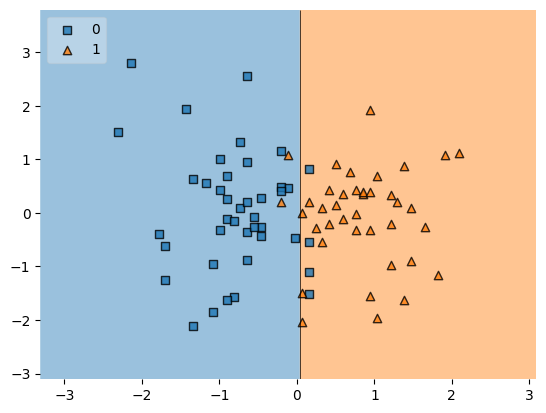

In [138]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)#inside this must be numpy array...
#so we converted y_train to numpy array and x_train was already numpy array

In [139]:
import pickle
pickle.dump(clf,open('model.pkl','wb'))